In [1]:
import COVID19Py
import requests
import matplotlib.pyplot as plt

covid19 = COVID19Py.COVID19(data_source="csbs")
print(covid19)

data = covid19.getLocations()
print(data)

[{'id': 0, 'country': 'US', 'country_code': 'US', 'country_population': 327167434, 'province': 'California', 'county': 'Los Angeles', 'last_updated': '2021-01-28T21:41:00Z', 'coordinates': {'latitude': '34.053490000000004', 'longitude': '-118.24532'}, 'latest': {'confirmed': 1098411, 'deaths': 16127, 'recovered': 0}}, {'id': 1, 'country': 'US', 'country_code': 'US', 'country_population': 327167434, 'province': 'California', 'county': 'San Bernardino', 'last_updated': '2021-01-28T21:41:00Z', 'coordinates': {'latitude': '34.10524', 'longitude': '-117.29412'}, 'latest': {'confirmed': 271189, 'deaths': 1776, 'recovered': 0}}, {'id': 2, 'country': 'US', 'country_code': 'US', 'country_population': 327167434, 'province': 'California', 'county': 'Riverside', 'last_updated': '2021-01-28T21:41:00Z', 'coordinates': {'latitude': '33.98171', 'longitude': '-117.37404'}, 'latest': {'confirmed': 270105, 'deaths': 3058, 'recovered': 0}}, {'id': 3, 'country': 'US', 'country_code': 'US', 'country_populat

In [2]:
ls = []
for i in data:
    country = i['country']
    province = i['province']
    county = i['county']
    last_updated = i['last_updated']
    ls.append(country)
    ls.append(province)
    ls.append(county)
    ls.append(last_updated)
    for k,v in i['latest'].items():
        ls.append(v)
        
    

In [3]:
print(ls)

['US', 'California', 'Los Angeles', '2021-01-28T21:41:00Z', 1098411, 16127, 0, 'US', 'California', 'San Bernardino', '2021-01-28T21:41:00Z', 271189, 1776, 0, 'US', 'California', 'Riverside', '2021-01-28T21:41:00Z', 270105, 3058, 0, 'US', 'California', 'San Diego', '2021-01-28T21:41:00Z', 232970, 2534, 0, 'US', 'California', 'Orange', '2021-01-28T21:41:00Z', 228297, 2868, 0, 'US', 'California', 'Santa Clara', '2021-01-28T21:41:00Z', 100468, 1344, 0, 'US', 'California', 'Kern', '2021-01-28T21:41:00Z', 92327, 609, 0, 'US', 'California', 'Fresno', '2021-01-28T21:41:00Z', 86673, 1122, 0, 'US', 'California', 'Sacramento', '2021-01-28T21:41:00Z', 84901, 1216, 0, 'US', 'California', 'Alameda', '2021-01-28T21:41:00Z', 72597, 937, 0, 'US', 'California', 'Ventura', '2021-01-28T21:41:00Z', 68397, 579, 0, 'US', 'California', 'San Joaquin', '2021-01-28T21:41:00Z', 61548, 850, 0, 'US', 'California', 'Contra Costa', '2021-01-28T21:41:00Z', 56252, 525, 0, 'US', 'California', 'Stanislaus', '2021-01-28T2

In [4]:
# reshaping the size of array
def to_matrix(l, n):
      return [l[i:i+n] for i in range(0, len(l), n)]


In [5]:
import pandas as pd
df = pd.DataFrame.from_records(to_matrix(ls,7),columns=['country','province','county',
                                                        'last_updated','confirmed','deaths','recovered'
     ])

df.head(15)

,country,province,county,last_updated,confirmed,deaths,recovered
0,US,California,Los Angeles,2021-01-28T21:41:00Z,1098411,16127,0
1,US,California,San Bernardino,2021-01-28T21:41:00Z,271189,1776,0
2,US,California,Riverside,2021-01-28T21:41:00Z,270105,3058,0
3,US,California,San Diego,2021-01-28T21:41:00Z,232970,2534,0
4,US,California,Orange,2021-01-28T21:41:00Z,228297,2868,0
5,US,California,Santa Clara,2021-01-28T21:41:00Z,100468,1344,0
6,US,California,Kern,2021-01-28T21:41:00Z,92327,609,0
7,US,California,Fresno,2021-01-28T21:41:00Z,86673,1122,0
8,US,California,Sacramento,2021-01-28T21:41:00Z,84901,1216,0
9,US,California,Alameda,2021-01-28T21:41:00Z,72597,937,0


In [6]:
df.to_excel('./covid19_data.xlsx')

In [7]:
# printing the total number of rows and column
df.shape

(3155, 7)

In [8]:
# checking null values
df.isnull()

,country,province,county,last_updated,confirmed,deaths,recovered
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3150,False,False,False,False,False,False,False
3151,False,False,False,False,False,False,False
3152,False,False,False,False,False,False,False
3153,False,False,False,False,False,False,False


In [9]:
# replace null values with nan
df.fillna(0)

,country,province,county,last_updated,confirmed,deaths,recovered
0,US,California,Los Angeles,2021-01-28T21:41:00Z,1098411,16127,0
1,US,California,San Bernardino,2021-01-28T21:41:00Z,271189,1776,0
2,US,California,Riverside,2021-01-28T21:41:00Z,270105,3058,0
3,US,California,San Diego,2021-01-28T21:41:00Z,232970,2534,0
4,US,California,Orange,2021-01-28T21:41:00Z,228297,2868,0
...,...,...,...,...,...,...,...
3150,US,Guam,Guam,2021-01-28T21:41:00Z,7547,128,0
3151,US,US Virgin Islands,St. Thomas,2021-01-28T21:41:00Z,1175,0,0
3152,US,US Virgin Islands,St. Croix,2021-01-28T21:41:00Z,1007,0,0
3153,US,US Virgin Islands,St. John,2021-01-28T21:41:00Z,202,0,0


                          confirmed
province                           
Alabama                      452734
Alaska                        53000
Arizona                      745976
Arkansas                     288009
California                  3253897
Colorado                     391701
Connecticut                  247935
Delaware                      76318
District of Columbia          36132
Florida                     1684267
Georgia                      888841
Guam                           7547
Hawaii                        25366
Idaho                        161721
Illinois                    1116264
Indiana                      619995
Iowa                         315623
Kansas                       275209
Kentucky                     355868
Louisiana                    394505
Maine                         38453
Maryland                     348749
Massachusetts                487419
Michigan                     606614
Minnesota                    458178
Mississippi                 

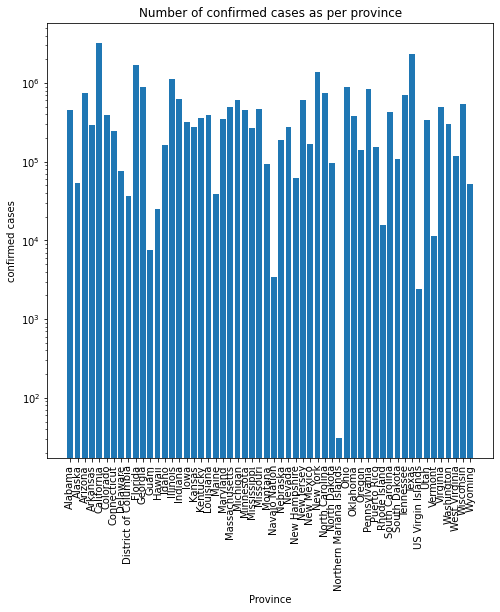

In [10]:

# df1
c_cases = df.groupby('province').sum()[['confirmed']]
print(c_cases)
figure = plt.gcf()

figure.set_size_inches(8, 8)

plt.bar(c_cases.index.values,c_cases['confirmed'])
plt.title('Number of confirmed cases as per province')
plt.yscale('log')
plt.xlabel('Province')
plt.ylabel('confirmed cases')
plt.plot()
plt.xticks(rotation=90)
plt.show()

# plt.bar(data_count.index.values,data_count['confirmed'])

In [11]:

date = df.groupby('last_updated').sum()[['confirmed']]
date

,confirmed
last_updated,
2021-01-28T21:41:00Z,25505564


Text(0.5, 1.0, 'Number of Countries as per province')

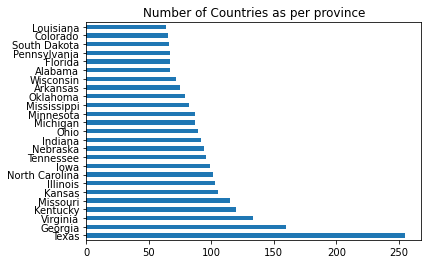

In [12]:
df['province'].value_counts()[:25].plot(kind='barh')
plt.title('Number of Countries as per province')


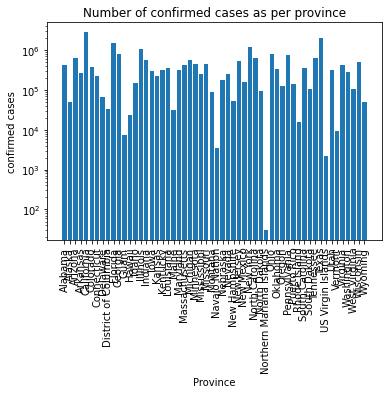

In [55]:
# checking the number of confirmed cases as per province
import matplotlib.pyplot as plt
data_count = df.groupby('province').sum()[['confirmed']]
plt.bar(data_count.index.values,data_count['confirmed'])
plt.title('Number of confirmed cases as per province')
plt.yscale('log')
plt.xlabel('Province')
plt.ylabel('confirmed cases')
plt.plot()
plt.xticks(rotation=90)
plt.show()


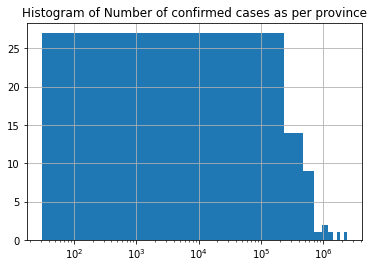

In [109]:
df.groupby('province').sum()[['confirmed']].hist()
plt.title('Histogram of Number of confirmed cases as per province')
plt.xscale('log')

In [110]:
data_count = df.groupby('province').sum()[['confirmed']]
data_count

,confirmed
province,
Alabama,369458
Alaska,45446
Arizona,539162
Arkansas,228809
California,2356477
Colorado,339186
Connecticut,189436
Delaware,58737
District of Columbia,29509


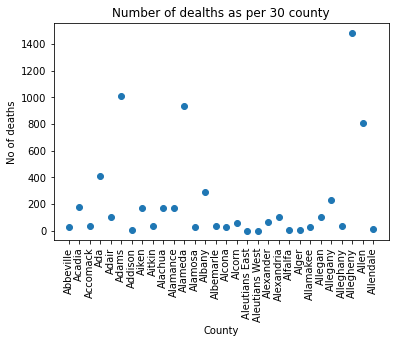

In [13]:
# checking the sum of number of dealths as per 30 county 
import matplotlib.pyplot as plt
as_per_county = df.groupby('county').sum()[['deaths']].head(30)
plt.scatter(as_per_county.index.values,as_per_county['deaths'])
plt.title('Number of dealths as per 30 county')
plt.xlabel('County')
plt.ylabel('No of deaths')

plt.plot()
plt.xticks(rotation=90)
plt.show()


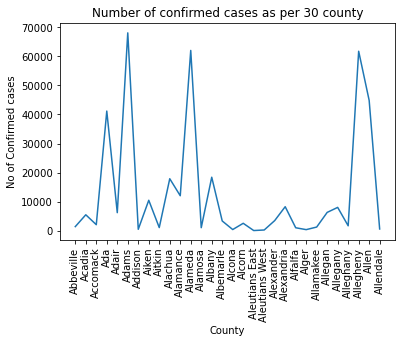

In [58]:
# checking the sum of number of confirmed cases as per 30 county 
import matplotlib.pyplot as plt
confirmed_as_per_country = df.groupby('county').sum()[['confirmed']].head(30)
plt.plot(confirmed_as_per_country.index.values,confirmed_as_per_country['confirmed'])
plt.title('Number of confirmed cases as per 30 county')
plt.xlabel('County')
plt.ylabel('No of Confirmed cases')
plt.plot()
plt.xticks(rotation=90)
plt.show()

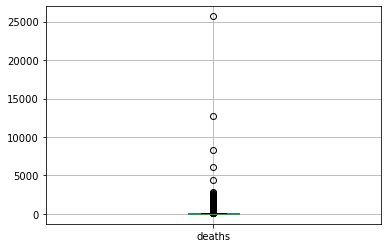

In [59]:
df.boxplot(column=['deaths'])

Text(0.5, 1.0, 'Number of confirmed cases as per 30 countries')

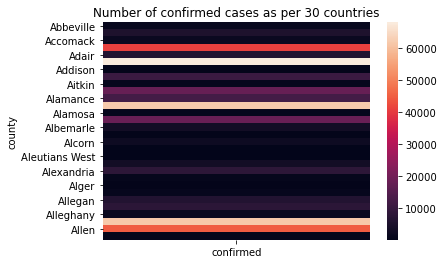

In [60]:
import seaborn as sns
sns.heatmap(data=confirmed_as_per_country)
plt.title('Number of confirmed cases as per 30 countries')